In [1]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV6
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH
import os
import numpy as np

/home/gil/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES']="0"

In [3]:
encoder, autoencoder, sess = autoencoderV6(3, cuda_device=0,RNN_cell='LSTM')

../models/RNN_autoencoder6.py:45: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge_layer = L.merge([dense_1_vl, dense_1_vh], mode='concat', name='merge_layer')
/home/gil/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [4]:
NAME= 'autoencoderV6'
RUN = 'run1'

weight_path = '../model_weights/{}/{}/{}_HCBeta.hdf5'.format(NAME,RUN,NAME)
log_path = '../logs/{}/{}_HCBeta'.format(NAME, RUN)

if not os.path.exists('../model_weights/{}/{}/'.format(NAME,RUN)):
    os.mkdir('../model_weights/{}'.format(NAME))
    os.mkdir('../model_weights/{}/{}'.format(NAME,RUN))

In [5]:
VL_encoded = np.load('/home/gil/PhD-Notebooks/Structure/HCBeta_light.npy')
VH_encoded = np.load('/home/gil/PhD-Notebooks/Structure/HCBeta_heavy.npy')

In [6]:
def add_padding(sequences, MAX_LENGTH):
    result = np.zeros((sequences.shape[0], MAX_LENGTH, 3))
    result[:,:sequences.shape[1]]=sequences
    return result

In [7]:
VH_encoded.shape

(900, 158, 3)

In [8]:
VL_encoded = add_padding(VL_encoded, 200)
VH_encoded = add_padding(VH_encoded, 250)

In [9]:
ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

../utils/data_preprocessing.py:57: RuntimeWarning: divide by zero encountered in true_divide
  X = (X - self.min_) / (self.max_ - self.min_)
../utils/data_preprocessing.py:57: RuntimeWarning: invalid value encountered in true_divide
  X = (X - self.min_) / (self.max_ - self.min_)
../utils/data_preprocessing.py:57: RuntimeWarning: divide by zero encountered in true_divide
  X = (X - self.min_) / (self.max_ - self.min_)
../utils/data_preprocessing.py:57: RuntimeWarning: invalid value encountered in true_divide
  X = (X - self.min_) / (self.max_ - self.min_)


In [10]:
VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [11]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled],
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint(weight_path, save_best_only=True),
                                     keras.callbacks.TensorBoard(log_path)])

Train on 720 samples, validate on 180 samples
Epoch 1/2000
720/720 [==============================] - 2s 3ms/step - loss: 0.6166 - VL_output_loss: 0.3127 - VH_output_loss: 0.3039 - val_loss: 0.3177 - val_VL_output_loss: 0.1549 - val_VH_output_loss: 0.1628
Epoch 2/2000
720/720 [==============================] - 1s 905us/step - loss: 0.3131 - VL_output_loss: 0.1533 - VH_output_loss: 0.1597 - val_loss: 0.3049 - val_VL_output_loss: 0.1489 - val_VH_output_loss: 0.1560
Epoch 3/2000
720/720 [==============================] - 1s 940us/step - loss: 0.3034 - VL_output_loss: 0.1479 - VH_output_loss: 0.1555 - val_loss: 0.3016 - val_VL_output_loss: 0.1465 - val_VH_output_loss: 0.1551
Epoch 4/2000
720/720 [==============================] - 1s 953us/step - loss: 0.3016 - VL_output_loss: 0.1469 - VH_output_loss: 0.1547 - val_loss: 0.3004 - val_VL_output_loss: 0.1458 - val_VH_output_loss: 0.1545
Epoch 5/2000
720/720 [==============================] - 1s 945us/step - loss: 0.3003 - VL_output_loss: 0.146

720/720 [==============================] - 1s 870us/step - loss: 0.2853 - VL_output_loss: 0.1379 - VH_output_loss: 0.1475 - val_loss: 0.2854 - val_VL_output_loss: 0.1376 - val_VH_output_loss: 0.1478
Epoch 40/2000
720/720 [==============================] - 1s 906us/step - loss: 0.2854 - VL_output_loss: 0.1380 - VH_output_loss: 0.1475 - val_loss: 0.2853 - val_VL_output_loss: 0.1376 - val_VH_output_loss: 0.1478
Epoch 41/2000
720/720 [==============================] - 1s 949us/step - loss: 0.2853 - VL_output_loss: 0.1379 - VH_output_loss: 0.1475 - val_loss: 0.2852 - val_VL_output_loss: 0.1375 - val_VH_output_loss: 0.1477
Epoch 42/2000
720/720 [==============================] - 1s 835us/step - loss: 0.2852 - VL_output_loss: 0.1378 - VH_output_loss: 0.1474 - val_loss: 0.2852 - val_VL_output_loss: 0.1375 - val_VH_output_loss: 0.1477
Epoch 43/2000
720/720 [==============================] - 1s 825us/step - loss: 0.2852 - VL_output_loss: 0.1377 - VH_output_loss: 0.1474 - val_loss: 0.2852 - val_V

720/720 [==============================] - 1s 933us/step - loss: 0.2784 - VL_output_loss: 0.1310 - VH_output_loss: 0.1474 - val_loss: 0.2785 - val_VL_output_loss: 0.1308 - val_VH_output_loss: 0.1477
Epoch 78/2000
720/720 [==============================] - 1s 826us/step - loss: 0.2788 - VL_output_loss: 0.1315 - VH_output_loss: 0.1474 - val_loss: 0.2788 - val_VL_output_loss: 0.1311 - val_VH_output_loss: 0.1477
Epoch 79/2000
720/720 [==============================] - 1s 863us/step - loss: 0.2778 - VL_output_loss: 0.1304 - VH_output_loss: 0.1474 - val_loss: 0.2777 - val_VL_output_loss: 0.1300 - val_VH_output_loss: 0.1477
Epoch 80/2000
720/720 [==============================] - 1s 850us/step - loss: 0.2774 - VL_output_loss: 0.1300 - VH_output_loss: 0.1474 - val_loss: 0.2772 - val_VL_output_loss: 0.1296 - val_VH_output_loss: 0.1477
Epoch 81/2000
720/720 [==============================] - 1s 926us/step - loss: 0.2779 - VL_output_loss: 0.1305 - VH_output_loss: 0.1473 - val_loss: 0.2793 - val_V

720/720 [==============================] - 1s 916us/step - loss: 0.2716 - VL_output_loss: 0.1249 - VH_output_loss: 0.1467 - val_loss: 0.2715 - val_VL_output_loss: 0.1245 - val_VH_output_loss: 0.1470
Epoch 116/2000
720/720 [==============================] - 1s 895us/step - loss: 0.2709 - VL_output_loss: 0.1242 - VH_output_loss: 0.1467 - val_loss: 0.2712 - val_VL_output_loss: 0.1243 - val_VH_output_loss: 0.1469
Epoch 117/2000
720/720 [==============================] - 1s 921us/step - loss: 0.2704 - VL_output_loss: 0.1237 - VH_output_loss: 0.1466 - val_loss: 0.2700 - val_VL_output_loss: 0.1230 - val_VH_output_loss: 0.1470
Epoch 118/2000
720/720 [==============================] - 1s 860us/step - loss: 0.2696 - VL_output_loss: 0.1230 - VH_output_loss: 0.1466 - val_loss: 0.2698 - val_VL_output_loss: 0.1228 - val_VH_output_loss: 0.1470
Epoch 119/2000
720/720 [==============================] - 1s 953us/step - loss: 0.2691 - VL_output_loss: 0.1226 - VH_output_loss: 0.1466 - val_loss: 0.2688 - v

720/720 [==============================] - 1s 826us/step - loss: 0.2532 - VL_output_loss: 0.1104 - VH_output_loss: 0.1427 - val_loss: 0.2481 - val_VL_output_loss: 0.1050 - val_VH_output_loss: 0.1431
Epoch 154/2000
720/720 [==============================] - 1s 826us/step - loss: 0.2477 - VL_output_loss: 0.1050 - VH_output_loss: 0.1427 - val_loss: 0.2484 - val_VL_output_loss: 0.1053 - val_VH_output_loss: 0.1431
Epoch 155/2000
720/720 [==============================] - 1s 827us/step - loss: 0.2495 - VL_output_loss: 0.1069 - VH_output_loss: 0.1426 - val_loss: 0.2484 - val_VL_output_loss: 0.1054 - val_VH_output_loss: 0.1430
Epoch 156/2000
720/720 [==============================] - 1s 823us/step - loss: 0.2503 - VL_output_loss: 0.1077 - VH_output_loss: 0.1426 - val_loss: 0.2475 - val_VL_output_loss: 0.1046 - val_VH_output_loss: 0.1429
Epoch 157/2000
720/720 [==============================] - 1s 836us/step - loss: 0.2468 - VL_output_loss: 0.1043 - VH_output_loss: 0.1426 - val_loss: 0.2475 - v

720/720 [==============================] - 1s 826us/step - loss: 0.2445 - VL_output_loss: 0.1028 - VH_output_loss: 0.1417 - val_loss: 0.2445 - val_VL_output_loss: 0.1022 - val_VH_output_loss: 0.1424
Epoch 192/2000
720/720 [==============================] - 1s 827us/step - loss: 0.2465 - VL_output_loss: 0.1049 - VH_output_loss: 0.1416 - val_loss: 0.2444 - val_VL_output_loss: 0.1024 - val_VH_output_loss: 0.1419
Epoch 193/2000
720/720 [==============================] - 1s 825us/step - loss: 0.2439 - VL_output_loss: 0.1021 - VH_output_loss: 0.1418 - val_loss: 0.2438 - val_VL_output_loss: 0.1015 - val_VH_output_loss: 0.1423
Epoch 194/2000
720/720 [==============================] - 1s 836us/step - loss: 0.2431 - VL_output_loss: 0.1010 - VH_output_loss: 0.1422 - val_loss: 0.2441 - val_VL_output_loss: 0.1017 - val_VH_output_loss: 0.1424
Epoch 195/2000
720/720 [==============================] - 1s 846us/step - loss: 0.2427 - VL_output_loss: 0.1010 - VH_output_loss: 0.1417 - val_loss: 0.2445 - v

720/720 [==============================] - 1s 826us/step - loss: 0.2319 - VL_output_loss: 0.0918 - VH_output_loss: 0.1400 - val_loss: 0.2365 - val_VL_output_loss: 0.0962 - val_VH_output_loss: 0.1403
Epoch 230/2000
720/720 [==============================] - 1s 827us/step - loss: 0.2367 - VL_output_loss: 0.0971 - VH_output_loss: 0.1395 - val_loss: 0.2325 - val_VL_output_loss: 0.0927 - val_VH_output_loss: 0.1399
Epoch 231/2000
720/720 [==============================] - 1s 832us/step - loss: 0.2319 - VL_output_loss: 0.0924 - VH_output_loss: 0.1395 - val_loss: 0.2324 - val_VL_output_loss: 0.0922 - val_VH_output_loss: 0.1402
Epoch 232/2000
720/720 [==============================] - 1s 833us/step - loss: 0.2306 - VL_output_loss: 0.0908 - VH_output_loss: 0.1398 - val_loss: 0.2315 - val_VL_output_loss: 0.0914 - val_VH_output_loss: 0.1401
Epoch 233/2000
720/720 [==============================] - 1s 826us/step - loss: 0.2305 - VL_output_loss: 0.0909 - VH_output_loss: 0.1397 - val_loss: 0.2365 - v

720/720 [==============================] - 1s 826us/step - loss: 0.2128 - VL_output_loss: 0.0862 - VH_output_loss: 0.1266 - val_loss: 0.2138 - val_VL_output_loss: 0.0870 - val_VH_output_loss: 0.1267
Epoch 268/2000
720/720 [==============================] - 1s 827us/step - loss: 0.2122 - VL_output_loss: 0.0859 - VH_output_loss: 0.1263 - val_loss: 0.2136 - val_VL_output_loss: 0.0873 - val_VH_output_loss: 0.1264
Epoch 269/2000
720/720 [==============================] - 1s 827us/step - loss: 0.2131 - VL_output_loss: 0.0871 - VH_output_loss: 0.1260 - val_loss: 0.2137 - val_VL_output_loss: 0.0874 - val_VH_output_loss: 0.1263
Epoch 270/2000
720/720 [==============================] - 1s 832us/step - loss: 0.2115 - VL_output_loss: 0.0857 - VH_output_loss: 0.1257 - val_loss: 0.2146 - val_VL_output_loss: 0.0885 - val_VH_output_loss: 0.1261
Epoch 271/2000
720/720 [==============================] - 1s 826us/step - loss: 0.2110 - VL_output_loss: 0.0854 - VH_output_loss: 0.1256 - val_loss: 0.2166 - v

720/720 [==============================] - 1s 833us/step - loss: 0.2019 - VL_output_loss: 0.0833 - VH_output_loss: 0.1186 - val_loss: 0.2029 - val_VL_output_loss: 0.0853 - val_VH_output_loss: 0.1176
Epoch 306/2000
720/720 [==============================] - 1s 831us/step - loss: 0.2010 - VL_output_loss: 0.0843 - VH_output_loss: 0.1167 - val_loss: 0.2039 - val_VL_output_loss: 0.0843 - val_VH_output_loss: 0.1197
Epoch 307/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1999 - VL_output_loss: 0.0832 - VH_output_loss: 0.1167 - val_loss: 0.2006 - val_VL_output_loss: 0.0840 - val_VH_output_loss: 0.1167
Epoch 308/2000
720/720 [==============================] - 1s 826us/step - loss: 0.1983 - VL_output_loss: 0.0821 - VH_output_loss: 0.1162 - val_loss: 0.2008 - val_VL_output_loss: 0.0833 - val_VH_output_loss: 0.1175
Epoch 309/2000
720/720 [==============================] - 1s 828us/step - loss: 0.2002 - VL_output_loss: 0.0830 - VH_output_loss: 0.1171 - val_loss: 0.2005 - v

720/720 [==============================] - 1s 826us/step - loss: 0.1914 - VL_output_loss: 0.0790 - VH_output_loss: 0.1124 - val_loss: 0.1991 - val_VL_output_loss: 0.0832 - val_VH_output_loss: 0.1159
Epoch 344/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1956 - VL_output_loss: 0.0823 - VH_output_loss: 0.1133 - val_loss: 0.1932 - val_VL_output_loss: 0.0800 - val_VH_output_loss: 0.1133
Epoch 345/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1914 - VL_output_loss: 0.0789 - VH_output_loss: 0.1125 - val_loss: 0.1954 - val_VL_output_loss: 0.0812 - val_VH_output_loss: 0.1142
Epoch 346/2000
720/720 [==============================] - 1s 826us/step - loss: 0.1908 - VL_output_loss: 0.0780 - VH_output_loss: 0.1128 - val_loss: 0.1954 - val_VL_output_loss: 0.0797 - val_VH_output_loss: 0.1158
Epoch 347/2000
720/720 [==============================] - 1s 826us/step - loss: 0.1900 - VL_output_loss: 0.0780 - VH_output_loss: 0.1120 - val_loss: 0.1924 - v

720/720 [==============================] - 1s 826us/step - loss: 0.1882 - VL_output_loss: 0.0755 - VH_output_loss: 0.1127 - val_loss: 0.1908 - val_VL_output_loss: 0.0771 - val_VH_output_loss: 0.1137
Epoch 382/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1874 - VL_output_loss: 0.0751 - VH_output_loss: 0.1123 - val_loss: 0.1974 - val_VL_output_loss: 0.0801 - val_VH_output_loss: 0.1173
Epoch 383/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1911 - VL_output_loss: 0.0764 - VH_output_loss: 0.1147 - val_loss: 0.1990 - val_VL_output_loss: 0.0801 - val_VH_output_loss: 0.1189
Epoch 384/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1890 - VL_output_loss: 0.0762 - VH_output_loss: 0.1128 - val_loss: 0.1922 - val_VL_output_loss: 0.0794 - val_VH_output_loss: 0.1128
Epoch 385/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1897 - VL_output_loss: 0.0777 - VH_output_loss: 0.1120 - val_loss: 0.1946 - v

720/720 [==============================] - 1s 824us/step - loss: 0.1800 - VL_output_loss: 0.0725 - VH_output_loss: 0.1075 - val_loss: 0.1833 - val_VL_output_loss: 0.0747 - val_VH_output_loss: 0.1086
Epoch 420/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1820 - VL_output_loss: 0.0740 - VH_output_loss: 0.1080 - val_loss: 0.1934 - val_VL_output_loss: 0.0816 - val_VH_output_loss: 0.1118
Epoch 421/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1825 - VL_output_loss: 0.0748 - VH_output_loss: 0.1077 - val_loss: 0.1852 - val_VL_output_loss: 0.0756 - val_VH_output_loss: 0.1097
Epoch 422/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1805 - VL_output_loss: 0.0725 - VH_output_loss: 0.1080 - val_loss: 0.1835 - val_VL_output_loss: 0.0746 - val_VH_output_loss: 0.1089
Epoch 423/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1796 - VL_output_loss: 0.0723 - VH_output_loss: 0.1073 - val_loss: 0.1836 - v

720/720 [==============================] - 1s 826us/step - loss: 0.1848 - VL_output_loss: 0.0703 - VH_output_loss: 0.1146 - val_loss: 0.1867 - val_VL_output_loss: 0.0716 - val_VH_output_loss: 0.1151
Epoch 458/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1853 - VL_output_loss: 0.0709 - VH_output_loss: 0.1144 - val_loss: 0.1863 - val_VL_output_loss: 0.0718 - val_VH_output_loss: 0.1145
Epoch 459/2000
720/720 [==============================] - 1s 910us/step - loss: 0.1843 - VL_output_loss: 0.0697 - VH_output_loss: 0.1146 - val_loss: 0.1913 - val_VL_output_loss: 0.0731 - val_VH_output_loss: 0.1183
Epoch 460/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1866 - VL_output_loss: 0.0714 - VH_output_loss: 0.1152 - val_loss: 0.1891 - val_VL_output_loss: 0.0737 - val_VH_output_loss: 0.1154
Epoch 461/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1830 - VL_output_loss: 0.0694 - VH_output_loss: 0.1137 - val_loss: 0.1875 - v

720/720 [==============================] - 1s 827us/step - loss: 0.1772 - VL_output_loss: 0.0678 - VH_output_loss: 0.1094 - val_loss: 0.1845 - val_VL_output_loss: 0.0740 - val_VH_output_loss: 0.1105
Epoch 496/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1799 - VL_output_loss: 0.0676 - VH_output_loss: 0.1123 - val_loss: 0.1781 - val_VL_output_loss: 0.0685 - val_VH_output_loss: 0.1095
Epoch 497/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1751 - VL_output_loss: 0.0659 - VH_output_loss: 0.1092 - val_loss: 0.1799 - val_VL_output_loss: 0.0697 - val_VH_output_loss: 0.1102
Epoch 498/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1775 - VL_output_loss: 0.0672 - VH_output_loss: 0.1103 - val_loss: 0.1865 - val_VL_output_loss: 0.0706 - val_VH_output_loss: 0.1160
Epoch 499/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1777 - VL_output_loss: 0.0684 - VH_output_loss: 0.1093 - val_loss: 0.1828 - v

720/720 [==============================] - 1s 826us/step - loss: 0.1717 - VL_output_loss: 0.0670 - VH_output_loss: 0.1047 - val_loss: 0.1747 - val_VL_output_loss: 0.0689 - val_VH_output_loss: 0.1058
Epoch 534/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1699 - VL_output_loss: 0.0637 - VH_output_loss: 0.1062 - val_loss: 0.1764 - val_VL_output_loss: 0.0668 - val_VH_output_loss: 0.1096
Epoch 535/2000
720/720 [==============================] - 1s 826us/step - loss: 0.1761 - VL_output_loss: 0.0642 - VH_output_loss: 0.1119 - val_loss: 0.1835 - val_VL_output_loss: 0.0681 - val_VH_output_loss: 0.1154
Epoch 536/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1712 - VL_output_loss: 0.0639 - VH_output_loss: 0.1073 - val_loss: 0.1727 - val_VL_output_loss: 0.0656 - val_VH_output_loss: 0.1070
Epoch 537/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1673 - VL_output_loss: 0.0626 - VH_output_loss: 0.1047 - val_loss: 0.1709 - v

720/720 [==============================] - 1s 827us/step - loss: 0.1615 - VL_output_loss: 0.0601 - VH_output_loss: 0.1014 - val_loss: 0.1659 - val_VL_output_loss: 0.0635 - val_VH_output_loss: 0.1024
Epoch 572/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1616 - VL_output_loss: 0.0601 - VH_output_loss: 0.1015 - val_loss: 0.1654 - val_VL_output_loss: 0.0627 - val_VH_output_loss: 0.1027
Epoch 573/2000
720/720 [==============================] - 1s 826us/step - loss: 0.1612 - VL_output_loss: 0.0600 - VH_output_loss: 0.1012 - val_loss: 0.1654 - val_VL_output_loss: 0.0632 - val_VH_output_loss: 0.1021
Epoch 574/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1612 - VL_output_loss: 0.0600 - VH_output_loss: 0.1012 - val_loss: 0.1651 - val_VL_output_loss: 0.0626 - val_VH_output_loss: 0.1025
Epoch 575/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1617 - VL_output_loss: 0.0600 - VH_output_loss: 0.1017 - val_loss: 0.1664 - v

720/720 [==============================] - 1s 826us/step - loss: 0.1580 - VL_output_loss: 0.0586 - VH_output_loss: 0.0994 - val_loss: 0.1605 - val_VL_output_loss: 0.0614 - val_VH_output_loss: 0.0990
Epoch 610/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1568 - VL_output_loss: 0.0585 - VH_output_loss: 0.0983 - val_loss: 0.1600 - val_VL_output_loss: 0.0613 - val_VH_output_loss: 0.0987
Epoch 611/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1581 - VL_output_loss: 0.0584 - VH_output_loss: 0.0997 - val_loss: 0.1611 - val_VL_output_loss: 0.0612 - val_VH_output_loss: 0.0999
Epoch 612/2000
720/720 [==============================] - 1s 825us/step - loss: 0.1570 - VL_output_loss: 0.0584 - VH_output_loss: 0.0986 - val_loss: 0.1595 - val_VL_output_loss: 0.0612 - val_VH_output_loss: 0.0984
Epoch 613/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1558 - VL_output_loss: 0.0583 - VH_output_loss: 0.0975 - val_loss: 0.1601 - v

720/720 [==============================] - 1s 830us/step - loss: 0.1534 - VL_output_loss: 0.0576 - VH_output_loss: 0.0958 - val_loss: 0.1555 - val_VL_output_loss: 0.0599 - val_VH_output_loss: 0.0957
Epoch 648/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1516 - VL_output_loss: 0.0570 - VH_output_loss: 0.0946 - val_loss: 0.1542 - val_VL_output_loss: 0.0598 - val_VH_output_loss: 0.0944
Epoch 649/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1510 - VL_output_loss: 0.0571 - VH_output_loss: 0.0939 - val_loss: 0.1550 - val_VL_output_loss: 0.0599 - val_VH_output_loss: 0.0952
Epoch 650/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1517 - VL_output_loss: 0.0569 - VH_output_loss: 0.0947 - val_loss: 0.1544 - val_VL_output_loss: 0.0596 - val_VH_output_loss: 0.0947
Epoch 651/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1516 - VL_output_loss: 0.0569 - VH_output_loss: 0.0946 - val_loss: 0.1566 - v

720/720 [==============================] - 1s 837us/step - loss: 0.1457 - VL_output_loss: 0.0559 - VH_output_loss: 0.0899 - val_loss: 0.1504 - val_VL_output_loss: 0.0587 - val_VH_output_loss: 0.0917
Epoch 686/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1468 - VL_output_loss: 0.0560 - VH_output_loss: 0.0908 - val_loss: 0.1496 - val_VL_output_loss: 0.0589 - val_VH_output_loss: 0.0906
Epoch 687/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1454 - VL_output_loss: 0.0557 - VH_output_loss: 0.0896 - val_loss: 0.1484 - val_VL_output_loss: 0.0583 - val_VH_output_loss: 0.0902
Epoch 688/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1449 - VL_output_loss: 0.0557 - VH_output_loss: 0.0892 - val_loss: 0.1515 - val_VL_output_loss: 0.0591 - val_VH_output_loss: 0.0923
Epoch 689/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1495 - VL_output_loss: 0.0579 - VH_output_loss: 0.0916 - val_loss: 0.1505 - v

720/720 [==============================] - 1s 833us/step - loss: 0.1547 - VL_output_loss: 0.0552 - VH_output_loss: 0.0995 - val_loss: 0.1574 - val_VL_output_loss: 0.0582 - val_VH_output_loss: 0.0992
Epoch 724/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1543 - VL_output_loss: 0.0558 - VH_output_loss: 0.0984 - val_loss: 0.1571 - val_VL_output_loss: 0.0582 - val_VH_output_loss: 0.0989
Epoch 725/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1531 - VL_output_loss: 0.0549 - VH_output_loss: 0.0982 - val_loss: 0.1586 - val_VL_output_loss: 0.0576 - val_VH_output_loss: 0.1010
Epoch 726/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1580 - VL_output_loss: 0.0592 - VH_output_loss: 0.0988 - val_loss: 0.1597 - val_VL_output_loss: 0.0600 - val_VH_output_loss: 0.0998
Epoch 727/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1548 - VL_output_loss: 0.0562 - VH_output_loss: 0.0985 - val_loss: 0.1563 - v

720/720 [==============================] - 1s 830us/step - loss: 0.1465 - VL_output_loss: 0.0541 - VH_output_loss: 0.0923 - val_loss: 0.1506 - val_VL_output_loss: 0.0572 - val_VH_output_loss: 0.0934
Epoch 762/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1459 - VL_output_loss: 0.0541 - VH_output_loss: 0.0919 - val_loss: 0.1499 - val_VL_output_loss: 0.0566 - val_VH_output_loss: 0.0933
Epoch 763/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1459 - VL_output_loss: 0.0537 - VH_output_loss: 0.0922 - val_loss: 0.1521 - val_VL_output_loss: 0.0568 - val_VH_output_loss: 0.0953
Epoch 764/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1464 - VL_output_loss: 0.0540 - VH_output_loss: 0.0924 - val_loss: 0.1487 - val_VL_output_loss: 0.0566 - val_VH_output_loss: 0.0921
Epoch 765/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1455 - VL_output_loss: 0.0536 - VH_output_loss: 0.0919 - val_loss: 0.1505 - v

720/720 [==============================] - 1s 832us/step - loss: 0.1368 - VL_output_loss: 0.0528 - VH_output_loss: 0.0840 - val_loss: 0.1416 - val_VL_output_loss: 0.0556 - val_VH_output_loss: 0.0860
Epoch 800/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1396 - VL_output_loss: 0.0530 - VH_output_loss: 0.0866 - val_loss: 0.1422 - val_VL_output_loss: 0.0557 - val_VH_output_loss: 0.0865
Epoch 801/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1373 - VL_output_loss: 0.0529 - VH_output_loss: 0.0844 - val_loss: 0.1400 - val_VL_output_loss: 0.0557 - val_VH_output_loss: 0.0843
Epoch 802/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1361 - VL_output_loss: 0.0530 - VH_output_loss: 0.0831 - val_loss: 0.1395 - val_VL_output_loss: 0.0556 - val_VH_output_loss: 0.0839
Epoch 803/2000
720/720 [==============================] - 1s 856us/step - loss: 0.1359 - VL_output_loss: 0.0528 - VH_output_loss: 0.0831 - val_loss: 0.1393 - v

720/720 [==============================] - 1s 831us/step - loss: 0.1323 - VL_output_loss: 0.0526 - VH_output_loss: 0.0797 - val_loss: 0.1369 - val_VL_output_loss: 0.0556 - val_VH_output_loss: 0.0814
Epoch 838/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1322 - VL_output_loss: 0.0528 - VH_output_loss: 0.0795 - val_loss: 0.1368 - val_VL_output_loss: 0.0562 - val_VH_output_loss: 0.0805
Epoch 839/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1316 - VL_output_loss: 0.0526 - VH_output_loss: 0.0790 - val_loss: 0.1354 - val_VL_output_loss: 0.0553 - val_VH_output_loss: 0.0801
Epoch 840/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1314 - VL_output_loss: 0.0524 - VH_output_loss: 0.0789 - val_loss: 0.1353 - val_VL_output_loss: 0.0551 - val_VH_output_loss: 0.0802
Epoch 841/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1312 - VL_output_loss: 0.0524 - VH_output_loss: 0.0788 - val_loss: 0.1352 - v

720/720 [==============================] - 1s 830us/step - loss: 0.1298 - VL_output_loss: 0.0519 - VH_output_loss: 0.0779 - val_loss: 0.1353 - val_VL_output_loss: 0.0547 - val_VH_output_loss: 0.0806
Epoch 876/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1296 - VL_output_loss: 0.0520 - VH_output_loss: 0.0776 - val_loss: 0.1353 - val_VL_output_loss: 0.0555 - val_VH_output_loss: 0.0799
Epoch 877/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1305 - VL_output_loss: 0.0522 - VH_output_loss: 0.0783 - val_loss: 0.1328 - val_VL_output_loss: 0.0549 - val_VH_output_loss: 0.0779
Epoch 878/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1296 - VL_output_loss: 0.0527 - VH_output_loss: 0.0768 - val_loss: 0.1325 - val_VL_output_loss: 0.0546 - val_VH_output_loss: 0.0779
Epoch 879/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1284 - VL_output_loss: 0.0519 - VH_output_loss: 0.0766 - val_loss: 0.1327 - v

720/720 [==============================] - 1s 829us/step - loss: 0.1255 - VL_output_loss: 0.0512 - VH_output_loss: 0.0743 - val_loss: 0.1299 - val_VL_output_loss: 0.0544 - val_VH_output_loss: 0.0754
Epoch 914/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1275 - VL_output_loss: 0.0513 - VH_output_loss: 0.0762 - val_loss: 0.1354 - val_VL_output_loss: 0.0548 - val_VH_output_loss: 0.0806
Epoch 915/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1280 - VL_output_loss: 0.0512 - VH_output_loss: 0.0768 - val_loss: 0.1303 - val_VL_output_loss: 0.0538 - val_VH_output_loss: 0.0765
Epoch 916/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1258 - VL_output_loss: 0.0513 - VH_output_loss: 0.0746 - val_loss: 0.1298 - val_VL_output_loss: 0.0540 - val_VH_output_loss: 0.0758
Epoch 917/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1259 - VL_output_loss: 0.0517 - VH_output_loss: 0.0743 - val_loss: 0.1303 - v

720/720 [==============================] - 1s 833us/step - loss: 0.1232 - VL_output_loss: 0.0507 - VH_output_loss: 0.0725 - val_loss: 0.1290 - val_VL_output_loss: 0.0535 - val_VH_output_loss: 0.0755
Epoch 952/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1235 - VL_output_loss: 0.0506 - VH_output_loss: 0.0729 - val_loss: 0.1285 - val_VL_output_loss: 0.0538 - val_VH_output_loss: 0.0747
Epoch 953/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1235 - VL_output_loss: 0.0506 - VH_output_loss: 0.0729 - val_loss: 0.1295 - val_VL_output_loss: 0.0538 - val_VH_output_loss: 0.0757
Epoch 954/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1237 - VL_output_loss: 0.0507 - VH_output_loss: 0.0730 - val_loss: 0.1276 - val_VL_output_loss: 0.0536 - val_VH_output_loss: 0.0739
Epoch 955/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1250 - VL_output_loss: 0.0517 - VH_output_loss: 0.0733 - val_loss: 0.1296 - v

720/720 [==============================] - 1s 830us/step - loss: 0.1221 - VL_output_loss: 0.0505 - VH_output_loss: 0.0716 - val_loss: 0.1262 - val_VL_output_loss: 0.0534 - val_VH_output_loss: 0.0728
Epoch 990/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1219 - VL_output_loss: 0.0502 - VH_output_loss: 0.0717 - val_loss: 0.1263 - val_VL_output_loss: 0.0530 - val_VH_output_loss: 0.0733
Epoch 991/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1224 - VL_output_loss: 0.0505 - VH_output_loss: 0.0719 - val_loss: 0.1291 - val_VL_output_loss: 0.0562 - val_VH_output_loss: 0.0729
Epoch 992/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1278 - VL_output_loss: 0.0559 - VH_output_loss: 0.0719 - val_loss: 0.1266 - val_VL_output_loss: 0.0540 - val_VH_output_loss: 0.0726
Epoch 993/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1230 - VL_output_loss: 0.0504 - VH_output_loss: 0.0726 - val_loss: 0.1270 - v

720/720 [==============================] - 1s 830us/step - loss: 0.1224 - VL_output_loss: 0.0515 - VH_output_loss: 0.0709 - val_loss: 0.1268 - val_VL_output_loss: 0.0538 - val_VH_output_loss: 0.0730
Epoch 1028/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1217 - VL_output_loss: 0.0507 - VH_output_loss: 0.0710 - val_loss: 0.1252 - val_VL_output_loss: 0.0533 - val_VH_output_loss: 0.0719
Epoch 1029/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1211 - VL_output_loss: 0.0503 - VH_output_loss: 0.0708 - val_loss: 0.1250 - val_VL_output_loss: 0.0532 - val_VH_output_loss: 0.0718
Epoch 1030/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1207 - VL_output_loss: 0.0501 - VH_output_loss: 0.0706 - val_loss: 0.1250 - val_VL_output_loss: 0.0529 - val_VH_output_loss: 0.0721
Epoch 1031/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1204 - VL_output_loss: 0.0499 - VH_output_loss: 0.0705 - val_loss: 0.1246

720/720 [==============================] - 1s 830us/step - loss: 0.1194 - VL_output_loss: 0.0492 - VH_output_loss: 0.0702 - val_loss: 0.1261 - val_VL_output_loss: 0.0524 - val_VH_output_loss: 0.0737
Epoch 1066/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1203 - VL_output_loss: 0.0499 - VH_output_loss: 0.0704 - val_loss: 0.1231 - val_VL_output_loss: 0.0520 - val_VH_output_loss: 0.0711
Epoch 1067/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1192 - VL_output_loss: 0.0492 - VH_output_loss: 0.0700 - val_loss: 0.1237 - val_VL_output_loss: 0.0519 - val_VH_output_loss: 0.0718
Epoch 1068/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1190 - VL_output_loss: 0.0490 - VH_output_loss: 0.0699 - val_loss: 0.1239 - val_VL_output_loss: 0.0520 - val_VH_output_loss: 0.0719
Epoch 1069/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1191 - VL_output_loss: 0.0491 - VH_output_loss: 0.0700 - val_loss: 0.1232

720/720 [==============================] - 1s 839us/step - loss: 0.1187 - VL_output_loss: 0.0491 - VH_output_loss: 0.0696 - val_loss: 0.1227 - val_VL_output_loss: 0.0517 - val_VH_output_loss: 0.0710
Epoch 1104/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1182 - VL_output_loss: 0.0488 - VH_output_loss: 0.0695 - val_loss: 0.1221 - val_VL_output_loss: 0.0516 - val_VH_output_loss: 0.0706
Epoch 1105/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1186 - VL_output_loss: 0.0489 - VH_output_loss: 0.0697 - val_loss: 0.1232 - val_VL_output_loss: 0.0519 - val_VH_output_loss: 0.0713
Epoch 1106/2000
720/720 [==============================] - 1s 838us/step - loss: 0.1187 - VL_output_loss: 0.0491 - VH_output_loss: 0.0696 - val_loss: 0.1231 - val_VL_output_loss: 0.0516 - val_VH_output_loss: 0.0714
Epoch 1107/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1194 - VL_output_loss: 0.0490 - VH_output_loss: 0.0704 - val_loss: 0.1230

720/720 [==============================] - 1s 829us/step - loss: 0.1176 - VL_output_loss: 0.0485 - VH_output_loss: 0.0691 - val_loss: 0.1226 - val_VL_output_loss: 0.0515 - val_VH_output_loss: 0.0711
Epoch 1142/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1179 - VL_output_loss: 0.0485 - VH_output_loss: 0.0694 - val_loss: 0.1218 - val_VL_output_loss: 0.0514 - val_VH_output_loss: 0.0704
Epoch 1143/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1175 - VL_output_loss: 0.0485 - VH_output_loss: 0.0690 - val_loss: 0.1228 - val_VL_output_loss: 0.0520 - val_VH_output_loss: 0.0708
Epoch 1144/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1182 - VL_output_loss: 0.0488 - VH_output_loss: 0.0694 - val_loss: 0.1222 - val_VL_output_loss: 0.0514 - val_VH_output_loss: 0.0708
Epoch 1145/2000
720/720 [==============================] - 1s 827us/step - loss: 0.1176 - VL_output_loss: 0.0486 - VH_output_loss: 0.0690 - val_loss: 0.1222

720/720 [==============================] - 1s 830us/step - loss: 0.1178 - VL_output_loss: 0.0493 - VH_output_loss: 0.0685 - val_loss: 0.1213 - val_VL_output_loss: 0.0515 - val_VH_output_loss: 0.0698
Epoch 1180/2000
720/720 [==============================] - 1s 837us/step - loss: 0.1169 - VL_output_loss: 0.0485 - VH_output_loss: 0.0684 - val_loss: 0.1208 - val_VL_output_loss: 0.0510 - val_VH_output_loss: 0.0698
Epoch 1181/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1166 - VL_output_loss: 0.0482 - VH_output_loss: 0.0683 - val_loss: 0.1209 - val_VL_output_loss: 0.0512 - val_VH_output_loss: 0.0697
Epoch 1182/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1168 - VL_output_loss: 0.0484 - VH_output_loss: 0.0684 - val_loss: 0.1211 - val_VL_output_loss: 0.0508 - val_VH_output_loss: 0.0703
Epoch 1183/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1167 - VL_output_loss: 0.0482 - VH_output_loss: 0.0685 - val_loss: 0.1213

720/720 [==============================] - 1s 831us/step - loss: 0.1163 - VL_output_loss: 0.0482 - VH_output_loss: 0.0681 - val_loss: 0.1198 - val_VL_output_loss: 0.0504 - val_VH_output_loss: 0.0694
Epoch 1218/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1160 - VL_output_loss: 0.0478 - VH_output_loss: 0.0682 - val_loss: 0.1200 - val_VL_output_loss: 0.0505 - val_VH_output_loss: 0.0695
Epoch 1219/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1161 - VL_output_loss: 0.0478 - VH_output_loss: 0.0683 - val_loss: 0.1214 - val_VL_output_loss: 0.0513 - val_VH_output_loss: 0.0701
Epoch 1220/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1172 - VL_output_loss: 0.0490 - VH_output_loss: 0.0682 - val_loss: 0.1211 - val_VL_output_loss: 0.0518 - val_VH_output_loss: 0.0693
Epoch 1221/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1163 - VL_output_loss: 0.0483 - VH_output_loss: 0.0680 - val_loss: 0.1198

720/720 [==============================] - 1s 830us/step - loss: 0.1153 - VL_output_loss: 0.0477 - VH_output_loss: 0.0677 - val_loss: 0.1201 - val_VL_output_loss: 0.0511 - val_VH_output_loss: 0.0690
Epoch 1256/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1160 - VL_output_loss: 0.0481 - VH_output_loss: 0.0678 - val_loss: 0.1209 - val_VL_output_loss: 0.0517 - val_VH_output_loss: 0.0692
Epoch 1257/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1165 - VL_output_loss: 0.0485 - VH_output_loss: 0.0680 - val_loss: 0.1214 - val_VL_output_loss: 0.0521 - val_VH_output_loss: 0.0693
Epoch 1258/2000
720/720 [==============================] - 1s 835us/step - loss: 0.1175 - VL_output_loss: 0.0494 - VH_output_loss: 0.0681 - val_loss: 0.1209 - val_VL_output_loss: 0.0509 - val_VH_output_loss: 0.0699
Epoch 1259/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1164 - VL_output_loss: 0.0480 - VH_output_loss: 0.0684 - val_loss: 0.1204

720/720 [==============================] - 1s 830us/step - loss: 0.1149 - VL_output_loss: 0.0474 - VH_output_loss: 0.0675 - val_loss: 0.1204 - val_VL_output_loss: 0.0508 - val_VH_output_loss: 0.0697
Epoch 1294/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1151 - VL_output_loss: 0.0473 - VH_output_loss: 0.0678 - val_loss: 0.1205 - val_VL_output_loss: 0.0514 - val_VH_output_loss: 0.0690
Epoch 1295/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1158 - VL_output_loss: 0.0482 - VH_output_loss: 0.0676 - val_loss: 0.1201 - val_VL_output_loss: 0.0511 - val_VH_output_loss: 0.0690
Epoch 1296/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1156 - VL_output_loss: 0.0480 - VH_output_loss: 0.0676 - val_loss: 0.1200 - val_VL_output_loss: 0.0504 - val_VH_output_loss: 0.0696
Epoch 1297/2000
720/720 [==============================] - 1s 848us/step - loss: 0.1150 - VL_output_loss: 0.0473 - VH_output_loss: 0.0677 - val_loss: 0.1186

720/720 [==============================] - 1s 831us/step - loss: 0.1154 - VL_output_loss: 0.0481 - VH_output_loss: 0.0673 - val_loss: 0.1213 - val_VL_output_loss: 0.0524 - val_VH_output_loss: 0.0688
Epoch 1332/2000
720/720 [==============================] - 1s 835us/step - loss: 0.1162 - VL_output_loss: 0.0489 - VH_output_loss: 0.0673 - val_loss: 0.1205 - val_VL_output_loss: 0.0517 - val_VH_output_loss: 0.0689
Epoch 1333/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1161 - VL_output_loss: 0.0488 - VH_output_loss: 0.0673 - val_loss: 0.1196 - val_VL_output_loss: 0.0505 - val_VH_output_loss: 0.0691
Epoch 1334/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1145 - VL_output_loss: 0.0472 - VH_output_loss: 0.0673 - val_loss: 0.1187 - val_VL_output_loss: 0.0499 - val_VH_output_loss: 0.0688
Epoch 1335/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1150 - VL_output_loss: 0.0475 - VH_output_loss: 0.0675 - val_loss: 0.1209

720/720 [==============================] - 1s 831us/step - loss: 0.1136 - VL_output_loss: 0.0466 - VH_output_loss: 0.0669 - val_loss: 0.1174 - val_VL_output_loss: 0.0491 - val_VH_output_loss: 0.0683
Epoch 1370/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1136 - VL_output_loss: 0.0467 - VH_output_loss: 0.0669 - val_loss: 0.1171 - val_VL_output_loss: 0.0488 - val_VH_output_loss: 0.0683
Epoch 1371/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1137 - VL_output_loss: 0.0468 - VH_output_loss: 0.0669 - val_loss: 0.1187 - val_VL_output_loss: 0.0499 - val_VH_output_loss: 0.0688
Epoch 1372/2000
720/720 [==============================] - 1s 835us/step - loss: 0.1139 - VL_output_loss: 0.0469 - VH_output_loss: 0.0670 - val_loss: 0.1176 - val_VL_output_loss: 0.0489 - val_VH_output_loss: 0.0686
Epoch 1373/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1137 - VL_output_loss: 0.0466 - VH_output_loss: 0.0671 - val_loss: 0.1174

720/720 [==============================] - 1s 831us/step - loss: 0.1171 - VL_output_loss: 0.0495 - VH_output_loss: 0.0676 - val_loss: 0.1189 - val_VL_output_loss: 0.0505 - val_VH_output_loss: 0.0684
Epoch 1408/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1137 - VL_output_loss: 0.0467 - VH_output_loss: 0.0670 - val_loss: 0.1167 - val_VL_output_loss: 0.0486 - val_VH_output_loss: 0.0681
Epoch 1409/2000
720/720 [==============================] - 1s 836us/step - loss: 0.1128 - VL_output_loss: 0.0461 - VH_output_loss: 0.0667 - val_loss: 0.1164 - val_VL_output_loss: 0.0484 - val_VH_output_loss: 0.0680
Epoch 1410/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1129 - VL_output_loss: 0.0461 - VH_output_loss: 0.0668 - val_loss: 0.1166 - val_VL_output_loss: 0.0485 - val_VH_output_loss: 0.0681
Epoch 1411/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1128 - VL_output_loss: 0.0462 - VH_output_loss: 0.0666 - val_loss: 0.1165

720/720 [==============================] - 1s 833us/step - loss: 0.1131 - VL_output_loss: 0.0464 - VH_output_loss: 0.0667 - val_loss: 0.1176 - val_VL_output_loss: 0.0489 - val_VH_output_loss: 0.0687
Epoch 1446/2000
720/720 [==============================] - 1s 850us/step - loss: 0.1133 - VL_output_loss: 0.0464 - VH_output_loss: 0.0668 - val_loss: 0.1173 - val_VL_output_loss: 0.0492 - val_VH_output_loss: 0.0681
Epoch 1447/2000
720/720 [==============================] - 1s 857us/step - loss: 0.1138 - VL_output_loss: 0.0471 - VH_output_loss: 0.0667 - val_loss: 0.1178 - val_VL_output_loss: 0.0493 - val_VH_output_loss: 0.0686
Epoch 1448/2000
720/720 [==============================] - 1s 835us/step - loss: 0.1132 - VL_output_loss: 0.0462 - VH_output_loss: 0.0669 - val_loss: 0.1165 - val_VL_output_loss: 0.0484 - val_VH_output_loss: 0.0680
Epoch 1449/2000
720/720 [==============================] - 1s 839us/step - loss: 0.1133 - VL_output_loss: 0.0466 - VH_output_loss: 0.0667 - val_loss: 0.1175

720/720 [==============================] - 1s 833us/step - loss: 0.1126 - VL_output_loss: 0.0460 - VH_output_loss: 0.0666 - val_loss: 0.1165 - val_VL_output_loss: 0.0485 - val_VH_output_loss: 0.0680
Epoch 1484/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1122 - VL_output_loss: 0.0456 - VH_output_loss: 0.0666 - val_loss: 0.1158 - val_VL_output_loss: 0.0476 - val_VH_output_loss: 0.0682
Epoch 1485/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1123 - VL_output_loss: 0.0457 - VH_output_loss: 0.0666 - val_loss: 0.1157 - val_VL_output_loss: 0.0478 - val_VH_output_loss: 0.0679
Epoch 1486/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1121 - VL_output_loss: 0.0457 - VH_output_loss: 0.0665 - val_loss: 0.1160 - val_VL_output_loss: 0.0480 - val_VH_output_loss: 0.0680
Epoch 1487/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1130 - VL_output_loss: 0.0459 - VH_output_loss: 0.0671 - val_loss: 0.1162

720/720 [==============================] - 1s 831us/step - loss: 0.1121 - VL_output_loss: 0.0455 - VH_output_loss: 0.0666 - val_loss: 0.1164 - val_VL_output_loss: 0.0482 - val_VH_output_loss: 0.0682
Epoch 1522/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1122 - VL_output_loss: 0.0455 - VH_output_loss: 0.0667 - val_loss: 0.1160 - val_VL_output_loss: 0.0480 - val_VH_output_loss: 0.0680
Epoch 1523/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1123 - VL_output_loss: 0.0457 - VH_output_loss: 0.0666 - val_loss: 0.1156 - val_VL_output_loss: 0.0476 - val_VH_output_loss: 0.0680
Epoch 1524/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1131 - VL_output_loss: 0.0466 - VH_output_loss: 0.0665 - val_loss: 0.1165 - val_VL_output_loss: 0.0487 - val_VH_output_loss: 0.0678
Epoch 1525/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1226 - VL_output_loss: 0.0562 - VH_output_loss: 0.0665 - val_loss: 0.1201

720/720 [==============================] - 1s 834us/step - loss: 0.1122 - VL_output_loss: 0.0455 - VH_output_loss: 0.0667 - val_loss: 0.1152 - val_VL_output_loss: 0.0474 - val_VH_output_loss: 0.0678
Epoch 1560/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1117 - VL_output_loss: 0.0451 - VH_output_loss: 0.0665 - val_loss: 0.1157 - val_VL_output_loss: 0.0474 - val_VH_output_loss: 0.0683
Epoch 1561/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1118 - VL_output_loss: 0.0453 - VH_output_loss: 0.0665 - val_loss: 0.1150 - val_VL_output_loss: 0.0473 - val_VH_output_loss: 0.0678
Epoch 1562/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1117 - VL_output_loss: 0.0452 - VH_output_loss: 0.0665 - val_loss: 0.1155 - val_VL_output_loss: 0.0473 - val_VH_output_loss: 0.0682
Epoch 1563/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1120 - VL_output_loss: 0.0454 - VH_output_loss: 0.0666 - val_loss: 0.1154

720/720 [==============================] - 1s 840us/step - loss: 0.1115 - VL_output_loss: 0.0449 - VH_output_loss: 0.0665 - val_loss: 0.1145 - val_VL_output_loss: 0.0467 - val_VH_output_loss: 0.0678
Epoch 1598/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1111 - VL_output_loss: 0.0445 - VH_output_loss: 0.0666 - val_loss: 0.1147 - val_VL_output_loss: 0.0467 - val_VH_output_loss: 0.0680
Epoch 1599/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1123 - VL_output_loss: 0.0456 - VH_output_loss: 0.0667 - val_loss: 0.1172 - val_VL_output_loss: 0.0494 - val_VH_output_loss: 0.0678
Epoch 1600/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1121 - VL_output_loss: 0.0454 - VH_output_loss: 0.0667 - val_loss: 0.1165 - val_VL_output_loss: 0.0485 - val_VH_output_loss: 0.0681
Epoch 1601/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1134 - VL_output_loss: 0.0467 - VH_output_loss: 0.0667 - val_loss: 0.1170

720/720 [==============================] - 1s 832us/step - loss: 0.1104 - VL_output_loss: 0.0439 - VH_output_loss: 0.0665 - val_loss: 0.1139 - val_VL_output_loss: 0.0460 - val_VH_output_loss: 0.0679
Epoch 1636/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1102 - VL_output_loss: 0.0438 - VH_output_loss: 0.0664 - val_loss: 0.1139 - val_VL_output_loss: 0.0459 - val_VH_output_loss: 0.0680
Epoch 1637/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1106 - VL_output_loss: 0.0440 - VH_output_loss: 0.0666 - val_loss: 0.1144 - val_VL_output_loss: 0.0464 - val_VH_output_loss: 0.0680
Epoch 1638/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1107 - VL_output_loss: 0.0442 - VH_output_loss: 0.0665 - val_loss: 0.1138 - val_VL_output_loss: 0.0460 - val_VH_output_loss: 0.0678
Epoch 1639/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1118 - VL_output_loss: 0.0453 - VH_output_loss: 0.0665 - val_loss: 0.1145

720/720 [==============================] - 1s 832us/step - loss: 0.1099 - VL_output_loss: 0.0433 - VH_output_loss: 0.0666 - val_loss: 0.1139 - val_VL_output_loss: 0.0455 - val_VH_output_loss: 0.0684
Epoch 1674/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1100 - VL_output_loss: 0.0433 - VH_output_loss: 0.0667 - val_loss: 0.1134 - val_VL_output_loss: 0.0452 - val_VH_output_loss: 0.0682
Epoch 1675/2000
720/720 [==============================] - 1s 828us/step - loss: 0.1099 - VL_output_loss: 0.0433 - VH_output_loss: 0.0666 - val_loss: 0.1134 - val_VL_output_loss: 0.0453 - val_VH_output_loss: 0.0681
Epoch 1676/2000
720/720 [==============================] - 1s 849us/step - loss: 0.1103 - VL_output_loss: 0.0437 - VH_output_loss: 0.0666 - val_loss: 0.1135 - val_VL_output_loss: 0.0453 - val_VH_output_loss: 0.0682
Epoch 1677/2000
720/720 [==============================] - 1s 838us/step - loss: 0.1104 - VL_output_loss: 0.0439 - VH_output_loss: 0.0665 - val_loss: 0.1134

720/720 [==============================] - 1s 832us/step - loss: 0.1092 - VL_output_loss: 0.0428 - VH_output_loss: 0.0665 - val_loss: 0.1128 - val_VL_output_loss: 0.0448 - val_VH_output_loss: 0.0680
Epoch 1712/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1094 - VL_output_loss: 0.0428 - VH_output_loss: 0.0665 - val_loss: 0.1125 - val_VL_output_loss: 0.0447 - val_VH_output_loss: 0.0678
Epoch 1713/2000
720/720 [==============================] - 1s 851us/step - loss: 0.1095 - VL_output_loss: 0.0432 - VH_output_loss: 0.0664 - val_loss: 0.1135 - val_VL_output_loss: 0.0456 - val_VH_output_loss: 0.0679
Epoch 1714/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1104 - VL_output_loss: 0.0439 - VH_output_loss: 0.0666 - val_loss: 0.1156 - val_VL_output_loss: 0.0476 - val_VH_output_loss: 0.0680
Epoch 1715/2000
720/720 [==============================] - 1s 838us/step - loss: 0.1099 - VL_output_loss: 0.0434 - VH_output_loss: 0.0665 - val_loss: 0.1126

720/720 [==============================] - 1s 833us/step - loss: 0.1088 - VL_output_loss: 0.0425 - VH_output_loss: 0.0664 - val_loss: 0.1133 - val_VL_output_loss: 0.0455 - val_VH_output_loss: 0.0678
Epoch 1750/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1089 - VL_output_loss: 0.0425 - VH_output_loss: 0.0664 - val_loss: 0.1122 - val_VL_output_loss: 0.0445 - val_VH_output_loss: 0.0677
Epoch 1751/2000
720/720 [==============================] - 1s 832us/step - loss: 0.1088 - VL_output_loss: 0.0425 - VH_output_loss: 0.0663 - val_loss: 0.1126 - val_VL_output_loss: 0.0446 - val_VH_output_loss: 0.0680
Epoch 1752/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1090 - VL_output_loss: 0.0426 - VH_output_loss: 0.0664 - val_loss: 0.1125 - val_VL_output_loss: 0.0446 - val_VH_output_loss: 0.0679
Epoch 1753/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1087 - VL_output_loss: 0.0423 - VH_output_loss: 0.0664 - val_loss: 0.1125

720/720 [==============================] - 1s 831us/step - loss: 0.1089 - VL_output_loss: 0.0425 - VH_output_loss: 0.0664 - val_loss: 0.1127 - val_VL_output_loss: 0.0447 - val_VH_output_loss: 0.0680
Epoch 1788/2000
720/720 [==============================] - 1s 833us/step - loss: 0.1088 - VL_output_loss: 0.0424 - VH_output_loss: 0.0664 - val_loss: 0.1151 - val_VL_output_loss: 0.0473 - val_VH_output_loss: 0.0678
Epoch 1789/2000
720/720 [==============================] - 1s 837us/step - loss: 0.1109 - VL_output_loss: 0.0444 - VH_output_loss: 0.0665 - val_loss: 0.1177 - val_VL_output_loss: 0.0499 - val_VH_output_loss: 0.0679
Epoch 1790/2000
720/720 [==============================] - 1s 831us/step - loss: 0.1105 - VL_output_loss: 0.0441 - VH_output_loss: 0.0665 - val_loss: 0.1126 - val_VL_output_loss: 0.0446 - val_VH_output_loss: 0.0680
Epoch 1791/2000
720/720 [==============================] - 1s 830us/step - loss: 0.1087 - VL_output_loss: 0.0424 - VH_output_loss: 0.0663 - val_loss: 0.1120

720/720 [==============================] - 1s 833us/step - loss: 0.1081 - VL_output_loss: 0.0417 - VH_output_loss: 0.0664 - val_loss: 0.1114 - val_VL_output_loss: 0.0436 - val_VH_output_loss: 0.0678
Epoch 1826/2000
720/720 [==============================] - 1s 836us/step - loss: 0.1077 - VL_output_loss: 0.0414 - VH_output_loss: 0.0663 - val_loss: 0.1121 - val_VL_output_loss: 0.0442 - val_VH_output_loss: 0.0679
Epoch 1827/2000
720/720 [==============================] - 1s 829us/step - loss: 0.1079 - VL_output_loss: 0.0415 - VH_output_loss: 0.0664 - val_loss: 0.1117 - val_VL_output_loss: 0.0438 - val_VH_output_loss: 0.0679
Epoch 1828/2000
720/720 [==============================] - 1s 912us/step - loss: 0.1082 - VL_output_loss: 0.0419 - VH_output_loss: 0.0663 - val_loss: 0.1112 - val_VL_output_loss: 0.0435 - val_VH_output_loss: 0.0678
Epoch 1829/2000
720/720 [==============================] - 1s 834us/step - loss: 0.1079 - VL_output_loss: 0.0415 - VH_output_loss: 0.0664 - val_loss: 0.1114

720/720 [==============================] - 1s 1ms/step - loss: 0.1080 - VL_output_loss: 0.0416 - VH_output_loss: 0.0664 - val_loss: 0.1122 - val_VL_output_loss: 0.0443 - val_VH_output_loss: 0.0680
Epoch 1864/2000
720/720 [==============================] - 1s 948us/step - loss: 0.1079 - VL_output_loss: 0.0416 - VH_output_loss: 0.0663 - val_loss: 0.1113 - val_VL_output_loss: 0.0436 - val_VH_output_loss: 0.0677
Epoch 1865/2000
720/720 [==============================] - 1s 930us/step - loss: 0.1079 - VL_output_loss: 0.0415 - VH_output_loss: 0.0664 - val_loss: 0.1123 - val_VL_output_loss: 0.0444 - val_VH_output_loss: 0.0679
Epoch 1866/2000
720/720 [==============================] - 1s 951us/step - loss: 0.1082 - VL_output_loss: 0.0418 - VH_output_loss: 0.0664 - val_loss: 0.1123 - val_VL_output_loss: 0.0442 - val_VH_output_loss: 0.0681
Epoch 1867/2000
720/720 [==============================] - 1s 894us/step - loss: 0.1089 - VL_output_loss: 0.0425 - VH_output_loss: 0.0664 - val_loss: 0.1111 -

720/720 [==============================] - 1s 868us/step - loss: 0.1084 - VL_output_loss: 0.0421 - VH_output_loss: 0.0663 - val_loss: 0.1112 - val_VL_output_loss: 0.0433 - val_VH_output_loss: 0.0679
Epoch 1902/2000
720/720 [==============================] - 1s 857us/step - loss: 0.1076 - VL_output_loss: 0.0411 - VH_output_loss: 0.0665 - val_loss: 0.1110 - val_VL_output_loss: 0.0430 - val_VH_output_loss: 0.0679
Epoch 1903/2000
720/720 [==============================] - 1s 846us/step - loss: 0.1073 - VL_output_loss: 0.0408 - VH_output_loss: 0.0665 - val_loss: 0.1126 - val_VL_output_loss: 0.0446 - val_VH_output_loss: 0.0680
Epoch 1904/2000
720/720 [==============================] - 1s 887us/step - loss: 0.1081 - VL_output_loss: 0.0417 - VH_output_loss: 0.0664 - val_loss: 0.1110 - val_VL_output_loss: 0.0434 - val_VH_output_loss: 0.0676
Epoch 1905/2000
720/720 [==============================] - 1s 850us/step - loss: 0.1074 - VL_output_loss: 0.0412 - VH_output_loss: 0.0662 - val_loss: 0.1117

720/720 [==============================] - 1s 1ms/step - loss: 0.1070 - VL_output_loss: 0.0406 - VH_output_loss: 0.0663 - val_loss: 0.1108 - val_VL_output_loss: 0.0431 - val_VH_output_loss: 0.0677
Epoch 1940/2000
720/720 [==============================] - 1s 1ms/step - loss: 0.1079 - VL_output_loss: 0.0417 - VH_output_loss: 0.0663 - val_loss: 0.1121 - val_VL_output_loss: 0.0441 - val_VH_output_loss: 0.0680
Epoch 1941/2000
720/720 [==============================] - 1s 868us/step - loss: 0.1072 - VL_output_loss: 0.0408 - VH_output_loss: 0.0664 - val_loss: 0.1109 - val_VL_output_loss: 0.0431 - val_VH_output_loss: 0.0678
Epoch 1942/2000
720/720 [==============================] - 1s 861us/step - loss: 0.1068 - VL_output_loss: 0.0404 - VH_output_loss: 0.0664 - val_loss: 0.1097 - val_VL_output_loss: 0.0418 - val_VH_output_loss: 0.0678
Epoch 1943/2000
720/720 [==============================] - 1s 963us/step - loss: 0.1064 - VL_output_loss: 0.0400 - VH_output_loss: 0.0663 - val_loss: 0.1115 - v

720/720 [==============================] - 1s 910us/step - loss: 0.1055 - VL_output_loss: 0.0392 - VH_output_loss: 0.0663 - val_loss: 0.1089 - val_VL_output_loss: 0.0413 - val_VH_output_loss: 0.0676
Epoch 1978/2000
720/720 [==============================] - 1s 901us/step - loss: 0.1055 - VL_output_loss: 0.0392 - VH_output_loss: 0.0663 - val_loss: 0.1090 - val_VL_output_loss: 0.0412 - val_VH_output_loss: 0.0678
Epoch 1979/2000
720/720 [==============================] - 1s 944us/step - loss: 0.1058 - VL_output_loss: 0.0394 - VH_output_loss: 0.0664 - val_loss: 0.1099 - val_VL_output_loss: 0.0422 - val_VH_output_loss: 0.0677
Epoch 1980/2000
720/720 [==============================] - 1s 896us/step - loss: 0.1057 - VL_output_loss: 0.0395 - VH_output_loss: 0.0662 - val_loss: 0.1094 - val_VL_output_loss: 0.0416 - val_VH_output_loss: 0.0678
Epoch 1981/2000
720/720 [==============================] - 1s 916us/step - loss: 0.1060 - VL_output_loss: 0.0398 - VH_output_loss: 0.0662 - val_loss: 0.1101

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

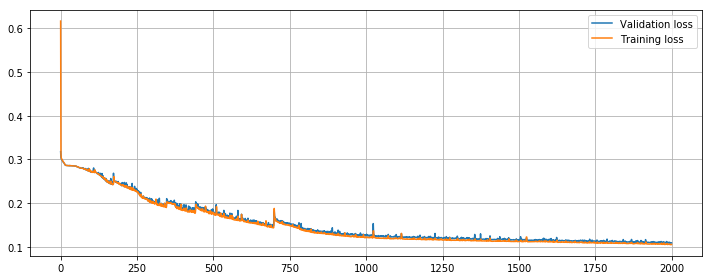

In [13]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

In [14]:
autoencoder.load_weights(weight_path)

In [16]:
code = encoder.predict([VL_encoded, VH_encoded])

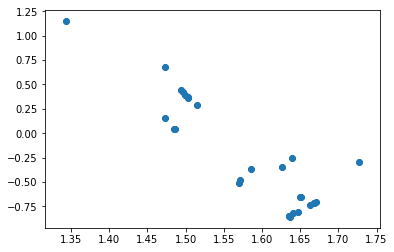

In [18]:
plt.scatter(code[:,0], code[:,1], marker='.', s=100)